In [2]:
# 데이터분석 라이브러리 pandas 가져와 pd로 축약어 사용
import pandas as pd
# 배열 연산 라이브러리 numpy 가져와 np로 축약어 사용
import numpy as np
# 그래프 그리는 라이브러리 matplotlib 중 일부 가져오기
import matplotlib.pyplot as plt

In [ ]:
# pandas Series 실행해보기
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [ ]:
s

In [3]:
# pandas DataFrame 사용하기
dates = pd.date_range('20300101', periods=6)
dates

DatetimeIndex(['2030-01-01', '2030-01-02', '2030-01-03', '2030-01-04',
               '2030-01-05', '2030-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2030-01-01,-0.839355,-0.180907,-0.461020,0.097283
2030-01-02,0.054210,0.363720,-0.790707,0.455149
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129
2030-01-04,-0.945357,0.324213,-1.661276,-1.419571
2030-01-05,-0.002042,0.665363,-0.861948,-2.711776
2030-01-06,1.367943,-2.025148,-0.032750,1.572128


In [ ]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20300102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'
                   })
df2

In [ ]:
df2.dtypes

In [ ]:
dir(df2)

In [ ]:
# 첫 5개 행의 데이터를 보여줍니다
df.head()

In [ ]:
# 마지막 3개 행의 데이터를 보여줍니다
df.tail(3)

In [ ]:
# DataFrame의 인덱스를 보기
df.index

In [ ]:
# 컬럼을 보기
df.columns

In [ ]:
# numpy 데이터 살펴보기
df.values

In [ ]:
# DataFrame의 간단한 통계 정보
df.describe()

In [ ]:
# 열과 행을 바꾼 형태의 DataFrame
df.T

In [ ]:
# 행과 열 일므을 정렬해보자
# axis=0은 인덱스, axis=1은 컬럼 기준
# ascending=True는 오름차순, False는 내림차순
df.sort_index(axis=1, ascending=False)

In [ ]:
# DataFrame 내부 값으로 정렬하기
# ascending=False 추가하면 반대로 뒤집어짐
df.sort_values(by='B')

In [5]:
df['A']

2030-01-01   -0.839355
2030-01-02    0.054210
2030-01-03   -0.571645
2030-01-04   -0.945357
2030-01-05   -0.002042
2030-01-06    1.367943
Freq: D, Name: A, dtype: float64

In [6]:
type(df['A'])

pandas.core.series.Series

In [7]:
# 맨 처음 3개의 행을 가져옵니다
df[0:3]

,A,B,C,D
2030-01-01,-0.839355,-0.180907,-0.461020,0.097283
2030-01-02,0.054210,0.363720,-0.790707,0.455149
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129


In [11]:
# 인덱스명에 해당하는 값을 가져옵니다
df['20300102':'20300104']

,A,B,C,D
2030-01-02,0.054210,0.363720,-0.790707,0.455149
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129
2030-01-04,-0.945357,0.324213,-1.661276,-1.419571


In [12]:
# 이름을 이용해 선택하기 .loc
df.loc[dates[0]]

A   -0.839355
B   -0.180907
C   -0.461020
D    0.097283
Name: 2030-01-01 00:00:00, dtype: float64

In [13]:
# 여러 칼럼 가져오기?
df.loc[:, ['A', 'B']]

,A,B
2030-01-01,-0.839355,-0.180907
2030-01-02,0.054210,0.363720
2030-01-03,-0.571645,0.286924
2030-01-04,-0.945357,0.324213
2030-01-05,-0.002042,0.665363
2030-01-06,1.367943,-2.025148


In [14]:
# 원하는 구간 가져오기
df.loc['20300102':'20300104', ['A','B']]

,A,B
2030-01-02,0.054210,0.363720
2030-01-03,-0.571645,0.286924
2030-01-04,-0.945357,0.324213


In [15]:
# 특정 인덱스값의 칼럼 'A', 'B' 가져오기
df.loc[dates[0], ['A','B']]

A   -0.839355
B   -0.180907
Name: 2030-01-01 00:00:00, dtype: float64

In [17]:
# 특정 인덱스 값과 특정 칼럼에 있는 값 가져오기
# df.loc[dates[0], 'A']
df.at[dates[0], 'A']

-0.8393554998219325

In [18]:
# 위치를 이용해 선택하기
df.iloc[3] # 0 1 2 3

A   -0.945357
B    0.324213
C   -1.661276
D   -1.419571
Name: 2030-01-04 00:00:00, dtype: float64

In [19]:
# 위치를 이용해 범위 선택하기
df.iloc[3:5, 0:2]

,A,B
2030-01-04,-0.945357,0.324213
2030-01-05,-0.002042,0.665363


In [20]:
# 행과 열의 인덱스로 리스트에 넘겨주기
# 2,3,5 행 + 1,3 열
df.iloc[[1,2,4], [0,2]]

,A,C
2030-01-02,0.054210,-0.790707
2030-01-03,-0.571645,-0.956991
2030-01-05,-0.002042,-0.861948


In [21]:
# : -> 열이나 행 전체를 가져오는 기호
df.iloc[1:3, :]

,A,B,C,D
2030-01-02,0.054210,0.363720,-0.790707,0.455149
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129


In [22]:
df.iloc[:, 1:3]

,B,C
2030-01-01,-0.180907,-0.461020
2030-01-02,0.363720,-0.790707
2030-01-03,0.286924,-0.956991
2030-01-04,0.324213,-1.661276
2030-01-05,0.665363,-0.861948
2030-01-06,-2.025148,-0.032750


In [23]:
# 값 하나를 선택하자
# 특정 행과 열을 지정
df.iloc[1,1]

0.3637199718406666

In [24]:
df.iat[1,1]

0.3637199718406666

In [25]:
# 조건을 이용하기
# A라는 열에 들어있는 값이 양수인 경우에 해당하는 행 선택
df[df.A > 0]

,A,B,C,D
2030-01-02,0.054210,0.363720,-0.790707,0.455149
2030-01-06,1.367943,-2.025148,-0.032750,1.572128


In [26]:
df[df > 0]

,A,B,C,D
2030-01-01,NaN,NaN,NaN,0.097283
2030-01-02,0.054210,0.363720,NaN,0.455149
2030-01-03,NaN,0.286924,NaN,NaN
2030-01-04,NaN,0.324213,NaN,NaN
2030-01-05,NaN,0.665363,NaN,NaN
2030-01-06,1.367943,NaN,NaN,1.572128


In [27]:
# 필터링 isin()
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2030-01-01,-0.839355,-0.180907,-0.461020,0.097283,one
2030-01-02,0.054210,0.363720,-0.790707,0.455149,one
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129,two
2030-01-04,-0.945357,0.324213,-1.661276,-1.419571,three
2030-01-05,-0.002042,0.665363,-0.861948,-2.711776,four
2030-01-06,1.367943,-2.025148,-0.032750,1.572128,three


In [28]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129,two
2030-01-05,-0.002042,0.665363,-0.861948,-2.711776,four


In [29]:
# 데이터 변경하기
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20300101', periods=6))
s1

2030-01-01    1
2030-01-02    2
2030-01-03    3
2030-01-04    4
2030-01-05    5
2030-01-06    6
Freq: D, dtype: int64

In [30]:
df['F'] = s1
df

,A,B,C,D,F
2030-01-01,-0.839355,-0.180907,-0.461020,0.097283,1
2030-01-02,0.054210,0.363720,-0.790707,0.455149,2
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129,3
2030-01-04,-0.945357,0.324213,-1.661276,-1.419571,4
2030-01-05,-0.002042,0.665363,-0.861948,-2.711776,5
2030-01-06,1.367943,-2.025148,-0.032750,1.572128,6


In [31]:
# 특정값 하나를 선택해 다른 값으로 바꾸기
df.at[dates[0], 'A'] = 0
# df.iat[0,1] = 0

In [32]:
df

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,0.097283,1
2030-01-02,0.054210,0.363720,-0.790707,0.455149,2
2030-01-03,-0.571645,0.286924,-0.956991,-0.015129,3
2030-01-04,-0.945357,0.324213,-1.661276,-1.419571,4
2030-01-05,-0.002042,0.665363,-0.861948,-2.711776,5
2030-01-06,1.367943,-2.025148,-0.032750,1.572128,6


In [33]:
# 한번에 여러 데이터 바꾸기
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,5,1
2030-01-02,0.054210,0.363720,-0.790707,5,2
2030-01-03,-0.571645,0.286924,-0.956991,5,3
2030-01-04,-0.945357,0.324213,-1.661276,5,4
2030-01-05,-0.002042,0.665363,-0.861948,5,5
2030-01-06,1.367943,-2.025148,-0.032750,5,6


In [34]:
# 음수만을 결과값으로 가지는 데이터 프레임
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,-5,-1
2030-01-02,-0.054210,-0.363720,-0.790707,-5,-2
2030-01-03,-0.571645,-0.286924,-0.956991,-5,-3
2030-01-04,-0.945357,-0.324213,-1.661276,-5,-4
2030-01-05,-0.002042,-0.665363,-0.861948,-5,-5
2030-01-06,-1.367943,-2.025148,-0.032750,-5,-6


In [39]:
# 결측치 = missing data
# np.nan -> Pandas는 연산에서 제외한다
# 재인덱싱은 해당 축에 대해 인덱스를 변경/추가/삭제를 하게됩니다
# 이는 복사한 데이터프레임을 반환합니다

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])


In [40]:
df1.loc[dates[0]: dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2030-01-01,0.000000,-0.180907,-0.461020,5,1,1.0
2030-01-02,0.054210,0.363720,-0.790707,5,2,1.0
2030-01-03,-0.571645,0.286924,-0.956991,5,3,NaN
2030-01-04,-0.945357,0.324213,-1.661276,5,4,NaN


In [41]:
# 결측치 존재하면 다버리는 dropna
df1.dropna(how='any')

,A,B,C,D,F,E
2030-01-01,0.00000,-0.180907,-0.461020,5,1,1.0
2030-01-02,0.05421,0.363720,-0.790707,5,2,1.0


In [42]:
# 결측치 존재하면 다른거로 채우는 fillna
df1.fillna(value=5)

,A,B,C,D,F,E
2030-01-01,0.000000,-0.180907,-0.461020,5,1,1.0
2030-01-02,0.054210,0.363720,-0.790707,5,2,1.0
2030-01-03,-0.571645,0.286924,-0.956991,5,3,5.0
2030-01-04,-0.945357,0.324213,-1.661276,5,4,5.0


In [43]:
# 해당 값이 결측치인지 확인하는 isna
pd.isna(df1)

,A,B,C,D,F,E
2030-01-01,False,False,False,False,False,False
2030-01-02,False,False,False,False,False,False
2030-01-03,False,False,False,False,False,True
2030-01-04,False,False,False,False,False,True


In [44]:
# 연산 
# 행으로 평균 구하기
df.mean()

A   -0.016148
B   -0.094306
C   -0.794115
D    5.000000
F    3.500000
dtype: float64

In [45]:
# 열을 기준으로 평균 구하기
df.mean(1)

2030-01-01    1.071615
2030-01-02    1.325444
2030-01-03    1.351658
2030-01-04    1.343516
2030-01-05    1.960275
2030-01-06    2.062009
Freq: D, dtype: float64

In [46]:
# 차원이 달라 인덱스를 맞춰야하는 두 오브젝트 간 연산 예제
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2030-01-01    NaN
2030-01-02    NaN
2030-01-03    1.0
2030-01-04    3.0
2030-01-05    5.0
2030-01-06    NaN
Freq: D, dtype: float64

In [48]:
df

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,5,1
2030-01-02,0.054210,0.363720,-0.790707,5,2
2030-01-03,-0.571645,0.286924,-0.956991,5,3
2030-01-04,-0.945357,0.324213,-1.661276,5,4
2030-01-05,-0.002042,0.665363,-0.861948,5,5
2030-01-06,1.367943,-2.025148,-0.032750,5,6


In [47]:
df.sub(s, axis='index')

,A,B,C,D,F
2030-01-01,NaN,NaN,NaN,NaN,NaN
2030-01-02,NaN,NaN,NaN,NaN,NaN
2030-01-03,-1.571645,-0.713076,-1.956991,4.0,2.0
2030-01-04,-3.945357,-2.675787,-4.661276,2.0,1.0
2030-01-05,-5.002042,-4.334637,-5.861948,0.0,0.0
2030-01-06,NaN,NaN,NaN,NaN,NaN


In [49]:
# 데이터프레임에 함수 적용하기
df.apply(np.cumsum)

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,5,1
2030-01-02,0.054210,0.182813,-1.251728,10,3
2030-01-03,-0.517435,0.469737,-2.208719,15,6
2030-01-04,-1.462791,0.793950,-3.869995,20,10
2030-01-05,-1.464833,1.459313,-4.731942,25,15
2030-01-06,-0.096891,-0.565834,-4.764692,30,21


In [50]:
df

,A,B,C,D,F
2030-01-01,0.000000,-0.180907,-0.461020,5,1
2030-01-02,0.054210,0.363720,-0.790707,5,2
2030-01-03,-0.571645,0.286924,-0.956991,5,3
2030-01-04,-0.945357,0.324213,-1.661276,5,4
2030-01-05,-0.002042,0.665363,-0.861948,5,5
2030-01-06,1.367943,-2.025148,-0.032750,5,6


In [51]:
df.apply(lambda x: x.max() - x.min())


A    2.313299
B    2.690511
C    1.628526
D    0.000000
F    5.000000
dtype: float64

In [55]:
# plot으로 그래프 그리기
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.726288
2000-01-02    0.573123
2000-01-03   -0.013281
2000-01-04   -0.575627
2000-01-05    1.158843
                ...   
2002-09-22   -0.442479
2002-09-23   -1.090573
2002-09-24    0.267036
2002-09-25   -0.481660
2002-09-26    0.892432
Freq: D, Length: 1000, dtype: float64

In [56]:
ts = ts.cumsum()
ts

2000-01-01    -0.726288
2000-01-02    -0.153165
2000-01-03    -0.166446
2000-01-04    -0.742073
2000-01-05     0.416770
                ...    
2002-09-22   -24.299527
2002-09-23   -25.390101
2002-09-24   -25.123065
2002-09-25   -25.604725
2002-09-26   -24.712293
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

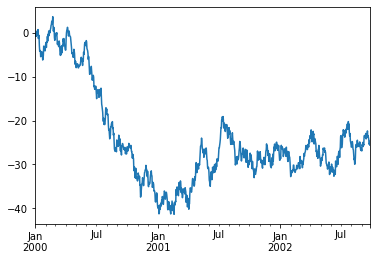

In [57]:
ts.plot()